In [1]:
print("""This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports""")

This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Load the CSV data
base_name = 'experiment_4'
file_path = f'{base_name}_extrapolation_results.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the loaded data
print("Loaded data:")
print(data)

Loaded data:
   Drop Percentage  Dropped Nodes  Avg Total Nodes Dropped  \
0             10.0              1                      1.4   
1             20.0              2                      2.9   
2             27.0              3                      4.7   
3             35.0              4                      6.0   
4             43.0              5                      7.3   
5             50.0              6                      8.4   

   Actual Drop Percentage  Average Success  Baseline  Difference  
0                8.235294            0.028     0.025       0.003  
1               17.058824            0.032     0.025       0.007  
2               27.647059            0.035     0.025       0.010  
3               35.294118            0.037     0.025       0.012  
4               42.941176            0.039     0.025       0.014  
5               49.411765            0.040     0.025       0.015  


In [5]:
# Extracting the variables for regression
X = data['Actual Drop Percentage'].values.reshape(-1, 1)  # Independent variable
y = data['Average Success'].values  # Dependent variable

In [6]:
# 3. Logistic Regression (sigmoid function)
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_function(x, L, k, x0):
    """
    Logistic function (sigmoid curve)
    L: the curve's maximum value
    k: the steepness
    x0: the x-value of the sigmoid's midpoint
    """
    return L / (1 + np.exp(-k * (x - x0)))

In [7]:
# Flatten the arrays for curve_fit
X_flat = X.flatten()
    
# Initial parameter estimates
p0 = [0.3, 0.05, 40]  # starting guess for [L, k, x0]
    
# Fit the logistic function
params, params_covariance = curve_fit(logistic_function, X_flat, y, p0=p0)
    
# Extract the parameters
L_fit, k_fit, x0_fit = params
    
# Generate predictions
y_pred_logistic = logistic_function(X_flat, L_fit, k_fit, x0_fit)
    
# Calculate metrics
r2_logistic = r2_score(y, y_pred_logistic)
mse_logistic = mean_squared_error(y, y_pred_logistic)

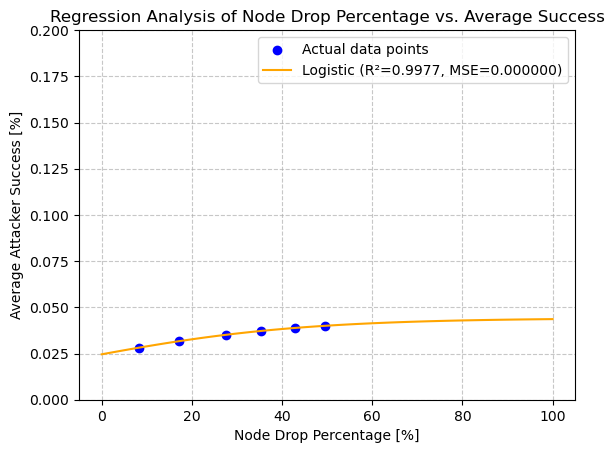

In [8]:
hnd =100
x_range = np.linspace(0, hnd, hnd).reshape(-1, 1)

# Generatinng predictions for range
y_pred_logistic_range = logistic_function(x_range.flatten(), L_fit, k_fit, x0_fit)
print("")
# Plotting actual data points
plt.ylim(0, 0.2)
plt.scatter(X, y, color='blue', label='Actual data points')


# Plottign the LRC
plt.plot(x_range, y_pred_logistic_range, color='orange', 
         label=f'Logistic (R²={r2_logistic:.4f}, MSE={mse_logistic:.6f})')

# Adding labels 
plt.xlabel('Node Drop Percentage [%]')
plt.ylabel('Average Attacker Success [%]')
plt.title('Regression Analysis of Node Drop Percentage vs. Average Success')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

## Flip the x-axis Labels 

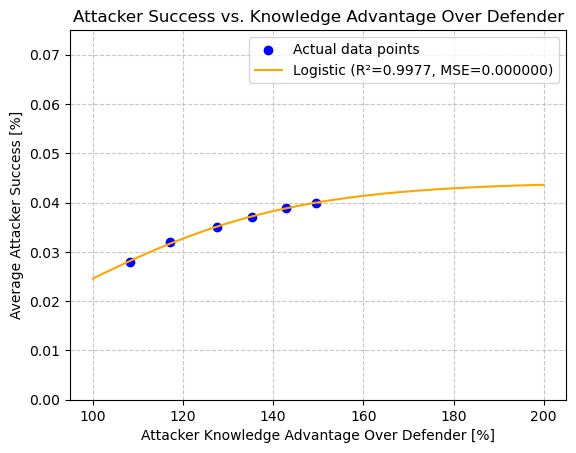

In [9]:
# Creatig range of x vals 
hnd =100 #hundred
x_range = np.linspace(0, hnd, hnd).reshape(-1, 1)

y_pred_logistic_range = logistic_function(x_range.flatten(), L_fit, k_fit, x0_fit)

x_transformed = x_range + hnd
X_transformed = X + hnd


# Plotting data points with x 
plt.ylim(0, 0.075)
plt.scatter(X_transformed, y, color='blue', label='Actual data points')

# Plotting the LRC 
plt.plot(x_transformed, y_pred_logistic_range, color='orange', 
         label=f'Logistic (R²={r2_logistic:.4f}, MSE={mse_logistic:.6f})')

# Addign the  label
plt.xlabel('Attacker Knowledge Advantage Over Defender [%]')
plt.ylabel('Average Attacker Success [%]')
plt.title('Attacker Success vs. Knowledge Advantage Over Defender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [10]:
def predict_success(drop_percentage): 
    
    # Convert to numpy array if list
    if isinstance(drop_percentage, list):
        return logistic_function(np.array(drop_percentage), L_fit, k_fit, x0_fit)
    else:
        return logistic_function(np.array([drop_percentage]), L_fit, k_fit, x0_fit)

In [11]:
# Example usage of the prediction function - Logistic Regression only
test_percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("\nPredictions for test percentages (Logistic Regression):")
print("Drop Percentage | Logistic Prediction")
print("-" * 40)

for percentage in test_percentages:
    logistic_pred = predict_success(percentage)[0]
    print(f"{percentage:14} | {logistic_pred:.6f}")


Predictions for test percentages (Logistic Regression):
Drop Percentage | Logistic Prediction
----------------------------------------
            10 | 0.028890
            20 | 0.032697
            30 | 0.035831
            40 | 0.038265
            50 | 0.040073
            60 | 0.041369
            70 | 0.042277
            80 | 0.042902
            90 | 0.043328
           100 | 0.043614


In [12]:
# Print the model equations
print("\nLogistic Regression Equation:")
print(f"Average Success = {L_fit:.6f} / (1 + exp(-{k_fit:.6f} × (Actual Drop Percentage - {x0_fit:.6f})))")


Logistic Regression Equation:
Average Success = 0.044192 / (1 + exp(-0.040987 × (Actual Drop Percentage - -5.504884)))


In [13]:
# Saving the  prdictions & coeff.

#  string concatenation
log_file_path = base_name + "_regression_results.log"
#print(log_file_path) 

# open the file
log_file = open(log_file_path, 'w')

# writing header 
log_file.write("==== REGRESSION RESULTS FOR " + str(base_name) + " =====\n\n")

# Save LR eq. parameters
log_file.write("LOGISTIC REGRESSION EQUATION PARAMETERS:\n")
log_file.write("L (curve's maximum value): " + "{:.6f}".format(L_fit) + "\n")
log_file.write("k (steepness): " + "{:.6f}".format(k_fit) + "\n")
log_file.write("x0 (sigmoid's midpoint): " + "{:.6f}".format(x0_fit) + "\n\n")

# long eq. string split for readability
eq_part1 = "Equation: Average Success = " + "{:.6f}".format(L_fit) + " / (1 + exp(-"
eq_part2 = "{:.6f}".format(k_fit) + " × (Actual Drop Percentage - " + "{:.6f}".format(x0_fit) + ")))\n\n"
log_file.write(eq_part1 + eq_part2)

# Saving the LR predictions
log_file.write("LOGISTIC REGRESSION PREDICTIONS:\n")
log_file.write("Drop Percentage | Logistic Prediction\n")
log_file.write(("-" * 40) + "\n")

# loop 
i = 0
while i < len(test_percentages):
    percentage = test_percentages[i]
    logistic_pred = predict_success(percentage)[0]
    
    #  padding logic 
    p_str = str(percentage)
    while len(p_str) < 14:
        p_str = " "+ p_str
    
    # concat.
    line = p_str + " | " + "{:.6f}".format(logistic_pred) + "\n"
    log_file.write(line)
    
    i = i + 1

# saving the metrics
log_file.write("\nMETRICS:\n")
log_file.write("R-squared: " + "{:.6f}".format(r2_logistic) + "\n")
log_file.write("Mean Squared Error: " + "{:.6f}".format(mse_logistic) + "\n")

# close the log file 
log_file.close()

print("\nResults saved to " + str(log_file_path))


Results saved to experiment_4_regression_results.log
